# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from datetime import date

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

#Define Global Variable
today = date.today()

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 619


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "q=" + city + "&appid=" + weather_api_key + "&units=metric"
    city_url = city_url.replace(" ", "%20")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = weather_json = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ribeira grande
Processing Record 2 of Set 1 | karratha
Processing Record 3 of Set 1 | guerrero negro
Processing Record 4 of Set 1 | barrow
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | port alfred
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | cayenne
Processing Record 9 of Set 1 | vaini
Processing Record 10 of Set 1 | tomatlan
Processing Record 11 of Set 1 | hithadhoo
Processing Record 12 of Set 1 | malm
Processing Record 13 of Set 1 | chokurdakh
Processing Record 14 of Set 1 | qaanaaq
Processing Record 15 of Set 1 | butaritari
Processing Record 16 of Set 1 | khovu-aksy
Processing Record 17 of Set 1 | phuthaditjhaba
Processing Record 18 of Set 1 | bargal
City not found. Skipping...
Processing Record 19 of Set 1 | spirit river
Processing Record 20 of Set 1 | shimoda
Processing Record 21 of Set 1 | aksarka
Processing Record 22 of Set 1 | albany
Proces

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame (city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ribeira grande,38.5167,-28.7000,13.21,81,77,2.68,PT,1680566519
1,karratha,-20.7377,116.8463,28.56,68,41,2.67,AU,1680566462
2,guerrero negro,27.9769,-114.0611,15.71,66,35,11.41,MX,1680566521
3,barrow,71.2906,-156.7887,-15.99,85,100,6.17,US,1680566521
4,ushuaia,-54.8000,-68.3000,9.81,71,75,8.23,AR,1680566522


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ribeira grande,38.5167,-28.7000,13.21,81,77,2.68,PT,1680566519
1,karratha,-20.7377,116.8463,28.56,68,41,2.67,AU,1680566462
2,guerrero negro,27.9769,-114.0611,15.71,66,35,11.41,MX,1680566521
3,barrow,71.2906,-156.7887,-15.99,85,100,6.17,US,1680566521
4,ushuaia,-54.8000,-68.3000,9.81,71,75,8.23,AR,1680566522


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

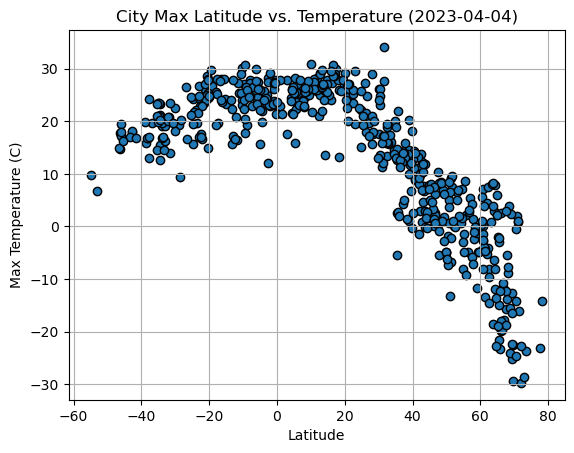

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title(f'City Max Latitude vs. Temperature ({today})')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

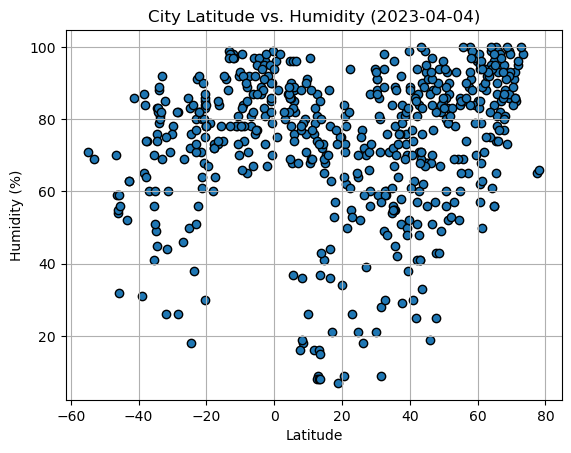

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs. Humidity ({today})')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

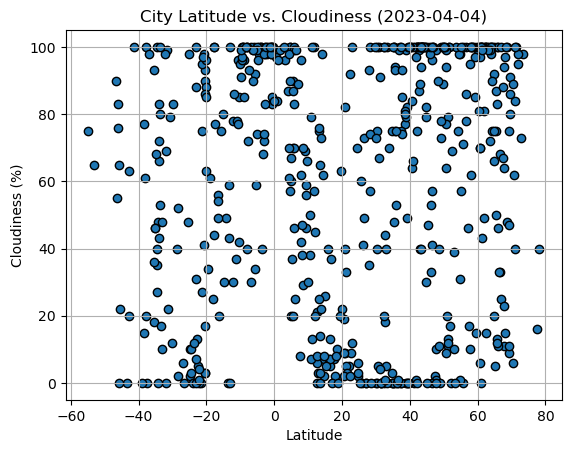

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs. Cloudiness ({today})')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

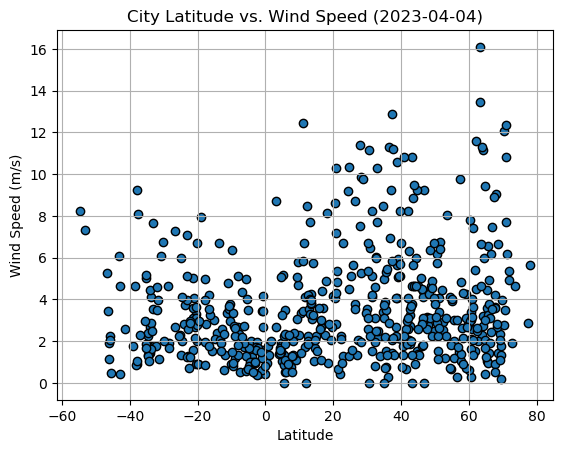

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title(f'City Latitude vs. Wind Speed ({today})')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def lin_reg(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_values.min(),y_values.min()),fontsize=15,color="red")
    print(f"The r value is: {rvalue}")

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ribeira grande,38.5167,-28.7000,13.21,81,77,2.68,PT,1680566519
2,guerrero negro,27.9769,-114.0611,15.71,66,35,11.41,MX,1680566521
3,barrow,71.2906,-156.7887,-15.99,85,100,6.17,US,1680566521
7,cayenne,4.9333,-52.3333,25.02,78,20,1.03,GF,1680566524
9,tomatlan,19.9333,-105.2500,29.12,34,22,4.14,MX,1680566526


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,karratha,-20.7377,116.8463,28.56,68,41,2.67,AU,1680566462
4,ushuaia,-54.8000,-68.3000,9.81,71,75,8.23,AR,1680566522
5,port alfred,-33.5906,26.8910,16.77,82,80,1.79,ZA,1680566523
6,mataura,-46.1927,168.8643,14.71,54,83,1.89,NZ,1680566524
8,vaini,-21.2000,-175.2000,26.17,64,27,5.02,TO,1680566526


###  Temperature vs. Latitude Linear Regression Plot

The r value is: -0.8918465993267526


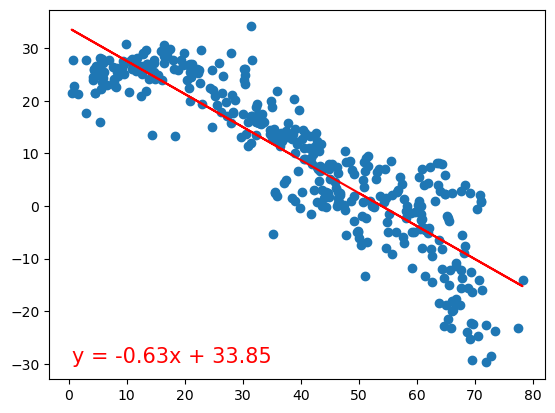

In [15]:
# Linear regression on Northern Hemisphere
lin_reg(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])

The r value is: 0.60766976892509


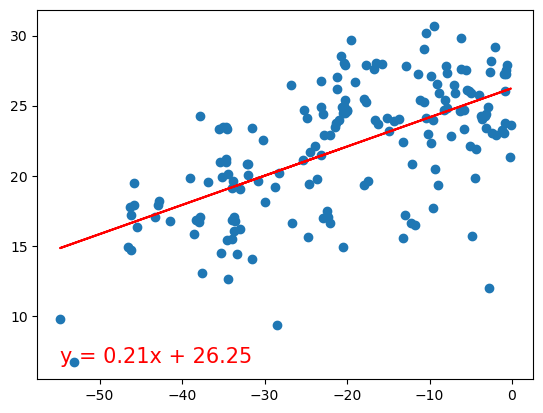

In [16]:
# Linear regression on Southern Hemisphere
lin_reg(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])

**Discussion about the linear relationship:** The relationship between the latitude vs temperature in the Northern Hemisphere and the Southern Hemisphere shows an inverse relationship. As the latitude increases the temperature decreases in the Northern Hemisphere and in the Southern Hemisphere, as the latitude increases the temperature increases. The R value of the Northern Hemipshere -0.89 indicates this negative relationship and the R value of the Southern Hemipshere 0.61 indicates this positive relationship. The correlation of the data points is stronger in the Northern Hemisphere than the Southern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r value is: 0.31563493696145384


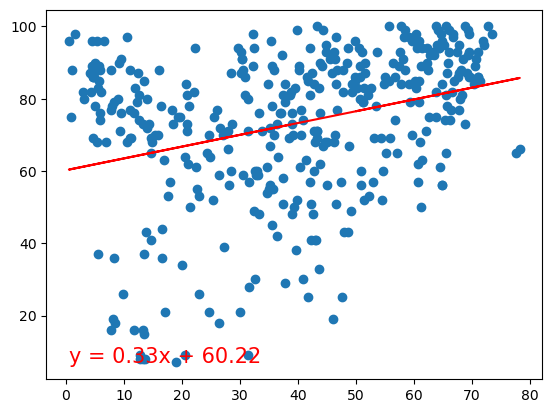

In [17]:
# Northern Hemisphere
lin_reg(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])

The r value is: 0.5069371586840917


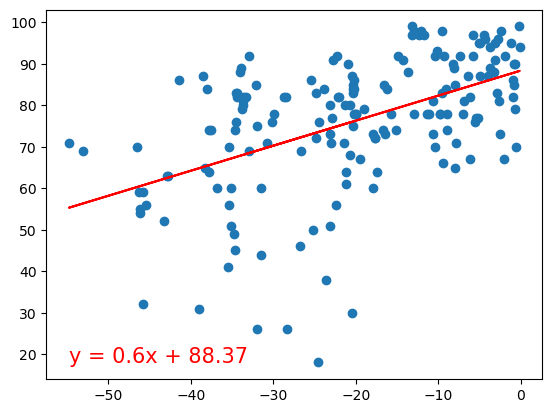

In [18]:
# Southern Hemisphere
lin_reg(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])

**Discussion about the linear relationship:** As the latitude increases, the humidity increases in the Northern Hemisphere and in the Southern Hemisphere. The R value of the Northern Hemipshere is 0.31 and the R value of the Southern Hemipshere is 0.51, which indicates that the latitude vs humidty has a stronger linear relationship in the Southern Hemipshere than the Northern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r value is: 0.20795657647353383


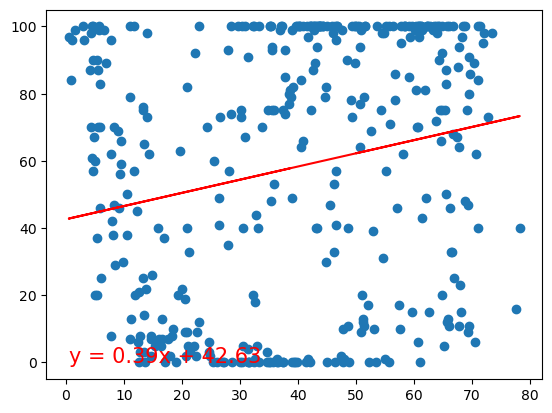

In [23]:
# Northern Hemisphere
lin_reg(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])

The r value is: 0.4013495640745508


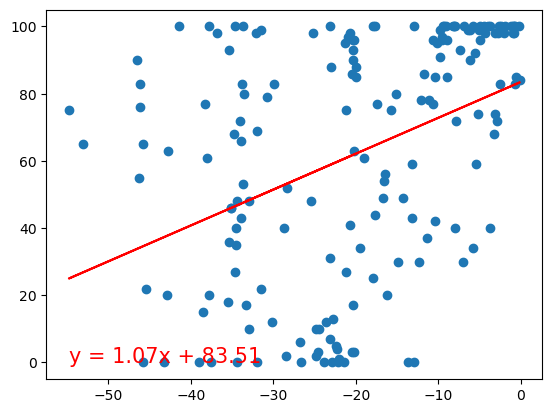

In [24]:
# Southern Hemisphere
lin_reg(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])

**Discussion about the linear relationship:** As the latitude increases, the cloudiness increases in the Northern Hemisphere and in the Southern Hemisphere. The R value of the Northern Hemipshere is 0.21 and the R value of the Southern Hemipshere is 0.40, which indicates that the latitude vs humidty has a stronger linear relationship in the Southern Hemipshere than the Northern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r value is: 0.1191904571293754


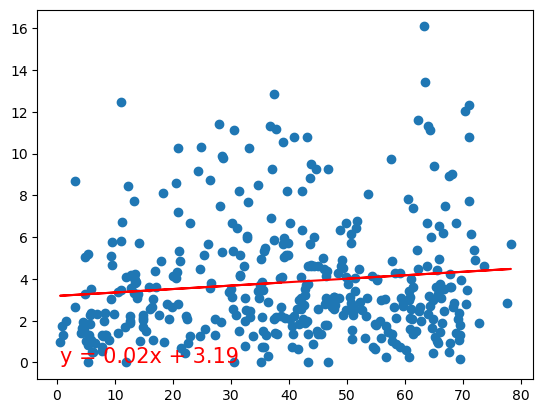

In [21]:
# Northern Hemisphere
lin_reg(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])

The r value is: -0.29794473708136665


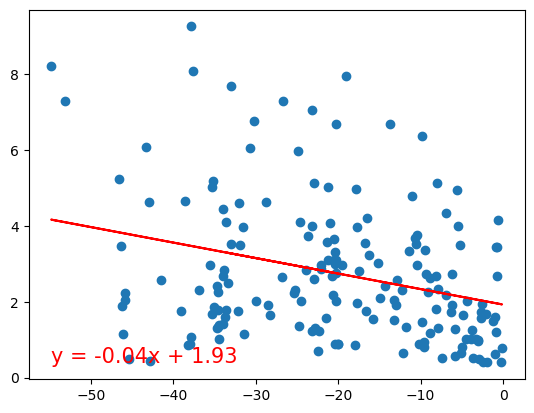

In [22]:
# Southern Hemisphere
lin_reg(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])

**Discussion about the linear relationship:** The relationship between the latitude vs Wind Speed in the Northern Hemisphere and the Southern Hemisphere shows an inverse relationship. As the latitude increases the Wind Speed increases in the Northern Hemisphere and in the Southern Hemisphere, as the latitude increases the Wind Speed decreases. The R value of the Northern Hemipshere 0.12 indicates this positive relationship and the R value of the Southern Hemipshere -0.30 indicates this negative relationship. The correlation of the data points is stronger in the Southern Hemisphere than the Northern Hemisphere.